In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
data = pd.read_csv('../data/Mall_Customers.csv')

print("Dataset shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())
print("\nData info:")
print(data.info())
print("\nSummary statistics:")
print(data.describe())
print("\nMissing values:", data.isnull().sum().sum())

Dataset shape: (200, 5)

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Drop CustomerID and encode Gender
data_encoded = data.copy()
data_encoded['Gender'] = data_encoded['Gender'].map({'Male': 0, 'Female': 1})

# Select numerical features for clustering
feature_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']
X = data_encoded[feature_cols].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Features used: {feature_cols}")
print(f"Scaled data shape: {X_scaled.shape}")
print(f"Mean after scaling: {X_scaled.mean(axis=0).round(3)}")
print(f"Std after scaling: {X_scaled.std(axis=0).round(3)}")

Features used: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']
Scaled data shape: (200, 4)
Mean after scaling: [-0. -0. -0. -0.]
Std after scaling: [1. 1. 1. 1.]


c:\Users\user\miniforge3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\miniforge3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\miniforge3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\miniforge3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known

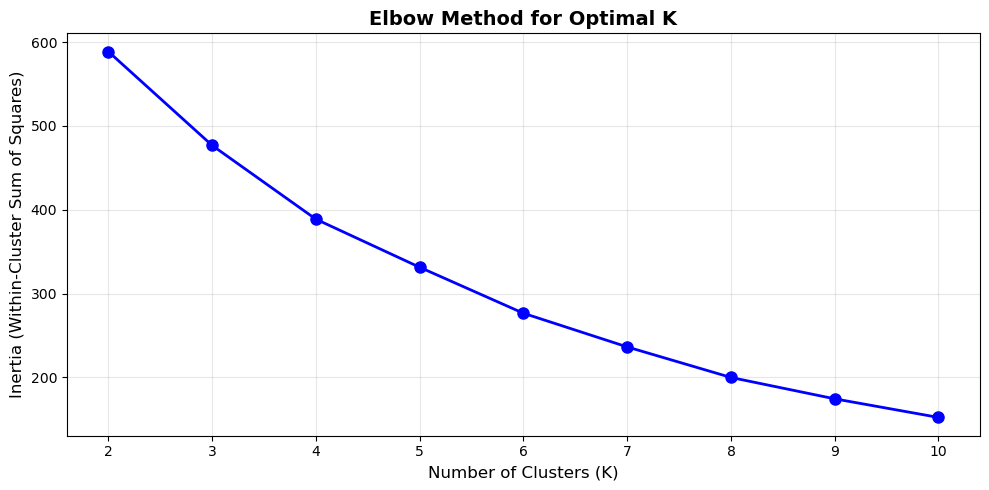

Inertia values:
K=2: 588.80
K=3: 476.79
K=4: 388.72
K=5: 331.31
K=6: 276.41
K=7: 236.20
K=8: 199.75
K=9: 174.24
K=10: 152.03


In [4]:
# Elbow method: Try K from 2 to 10
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.tight_layout()
plt.show()

print("Inertia values:")
for k, inertia in zip(K_range, inertias):
    print(f"K={k}: {inertia:.2f}")

c:\Users\user\miniforge3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\miniforge3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\miniforge3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\miniforge3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known

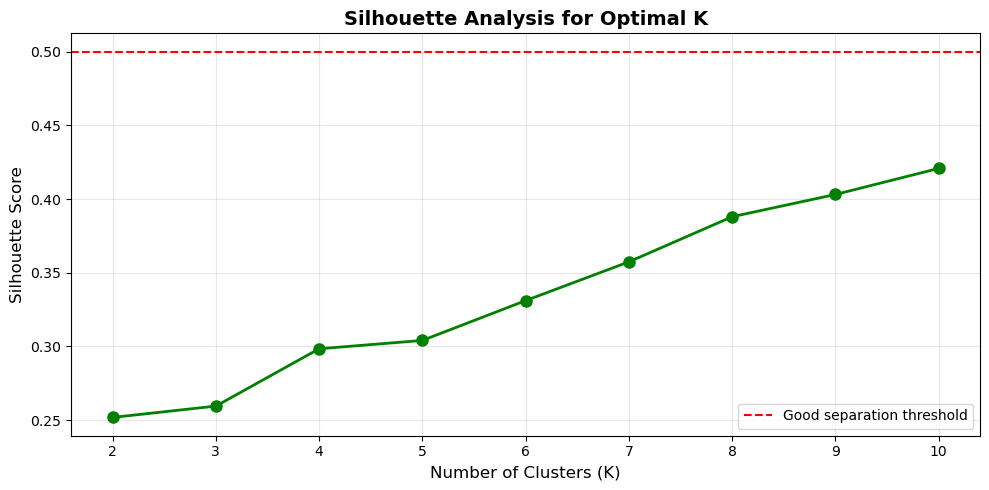

Silhouette scores:
K=2: 0.252
K=3: 0.260
K=4: 0.298
K=5: 0.304
K=6: 0.331
K=7: 0.357
K=8: 0.388
K=9: 0.403
K=10: 0.421


In [5]:
# Silhouette scores for K from 2 to 10
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Analysis for Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.axhline(y=0.5, color='r', linestyle='--', label='Good separation threshold')
plt.legend()
plt.tight_layout()
plt.show()

print("Silhouette scores:")
for k, score in zip(K_range, silhouette_scores):
    print(f"K={k}: {score:.3f}")

In [6]:
# Apply K-means with optimal K
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original data
data_clustered = data.copy()
data_clustered['Cluster'] = clusters

print(f"Clustering completed with K={optimal_k}")
print(f"\nCluster distribution:")
print(data_clustered['Cluster'].value_counts().sort_index())

Clustering completed with K=5

Cluster distribution:
Cluster
0    39
1    29
2    43
3    54
4    35
Name: count, dtype: int64


c:\Users\user\miniforge3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Statistics:
          Age       Annual Income (k$)       Spending Score (1-100)      
         mean count               mean count                   mean count
Cluster                                                                  
0        32.7    39               86.5    39                   82.1    39
1        36.5    29               89.5    29                   18.0    29
2        49.8    43               49.2    43                   40.1    43
3        24.9    54               39.7    54                   61.2    54
4        55.7    35               53.7    35                   36.8    35


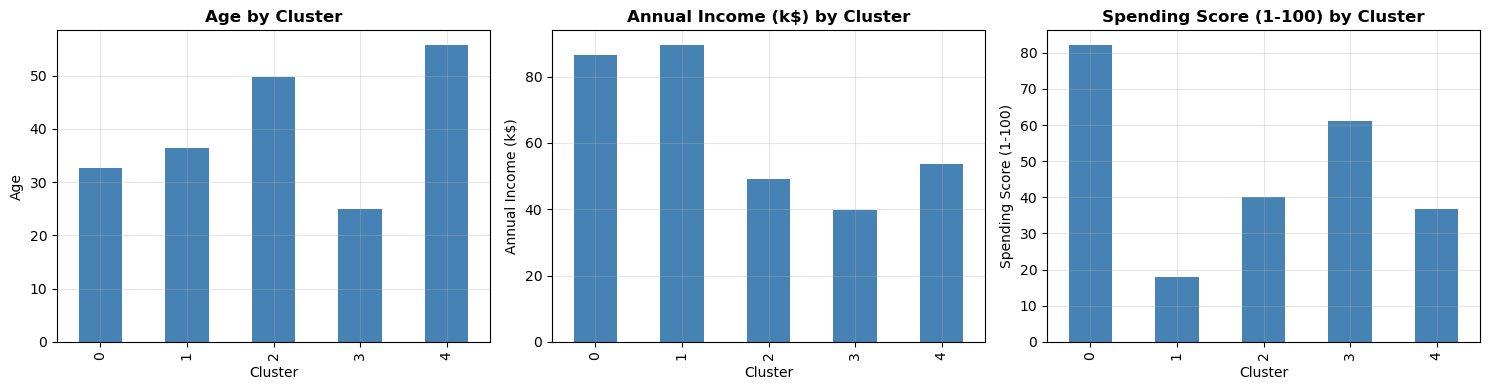

In [7]:
# Calculate cluster statistics
cluster_summary = data_clustered.groupby('Cluster')[['Age', 'Annual Income (k$)', 
                                                       'Spending Score (1-100)']].agg(['mean', 'count'])
print("Cluster Statistics:")
print(cluster_summary.round(1))

# Visualize cluster means
cluster_means = data_clustered.groupby('Cluster')[['Age', 'Annual Income (k$)', 
                                                     'Spending Score (1-100)']].mean()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for idx, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    cluster_means[col].plot(kind='bar', ax=axes[idx], color='steelblue')
    axes[idx].set_title(f'{col} by Cluster', fontweight='bold')
    axes[idx].set_xlabel('Cluster')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

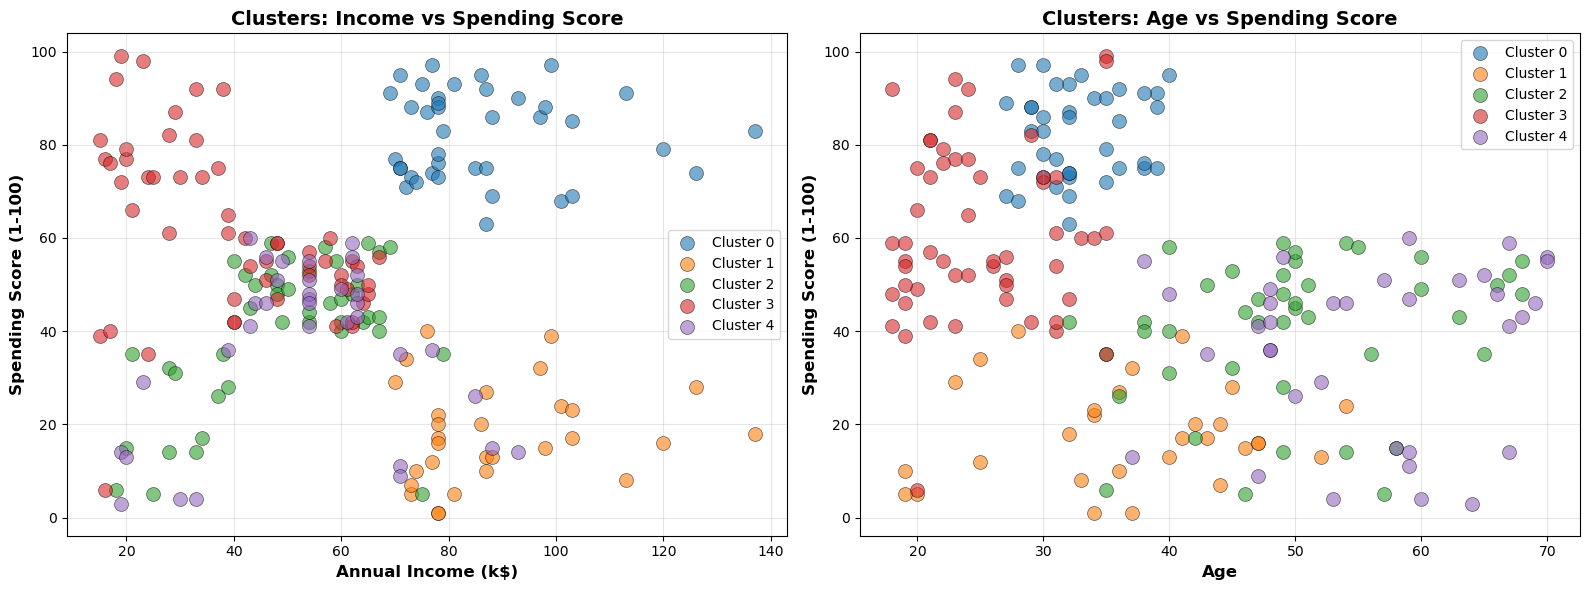

Clusters visualized using original feature space


In [11]:
# Visualize clusters using key features
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Income vs Spending Score
for cluster in range(optimal_k):
    cluster_data = data_clustered[data_clustered['Cluster'] == cluster]
    axes[0].scatter(cluster_data['Annual Income (k$)'], 
                   cluster_data['Spending Score (1-100)'],
                   label=f'Cluster {cluster}', alpha=0.6, s=100, edgecolors='black', linewidth=0.5)

axes[0].set_xlabel('Annual Income (k$)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Spending Score (1-100)', fontsize=12, fontweight='bold')
axes[0].set_title('Clusters: Income vs Spending Score', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Age vs Spending Score
for cluster in range(optimal_k):
    cluster_data = data_clustered[data_clustered['Cluster'] == cluster]
    axes[1].scatter(cluster_data['Age'], 
                   cluster_data['Spending Score (1-100)'],
                   label=f'Cluster {cluster}', alpha=0.6, s=100, edgecolors='black', linewidth=0.5)

axes[1].set_xlabel('Age', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Spending Score (1-100)', fontsize=12, fontweight='bold')
axes[1].set_title('Clusters: Age vs Spending Score', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Clusters visualized using original feature space")

PCA Results:
Explained variance ratio: [0.33690046 0.26230645]
Total variance explained: 59.9%


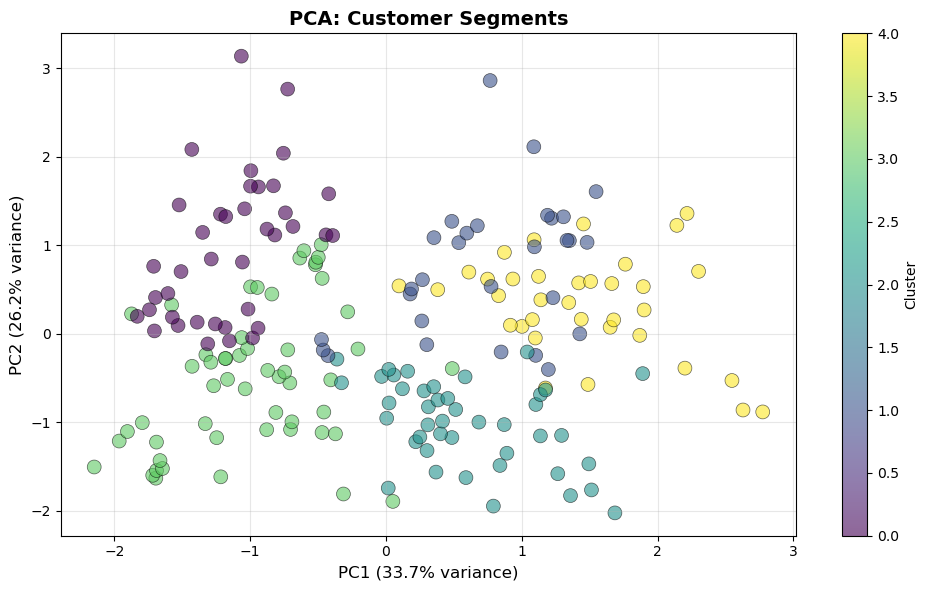

In [8]:
# Dimensionality Reduction
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("PCA Results:")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.1%}")

# Visualize PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', 
                     s=100, alpha=0.6, edgecolors='black', linewidth=0.5)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
plt.title('PCA: Customer Segments', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

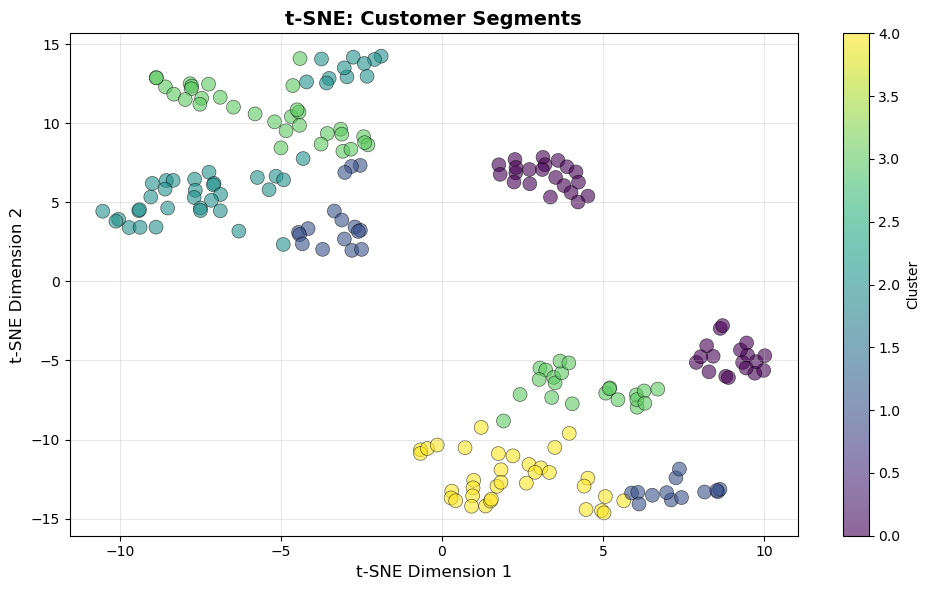

In [9]:
from sklearn.manifold import TSNE
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize t-SNE
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', 
                     s=100, alpha=0.6, edgecolors='black', linewidth=0.5)
plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)
plt.title('t-SNE: Customer Segments', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


c:\Users\user\miniforge3\envs\ml\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\user\miniforge3\envs\ml\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


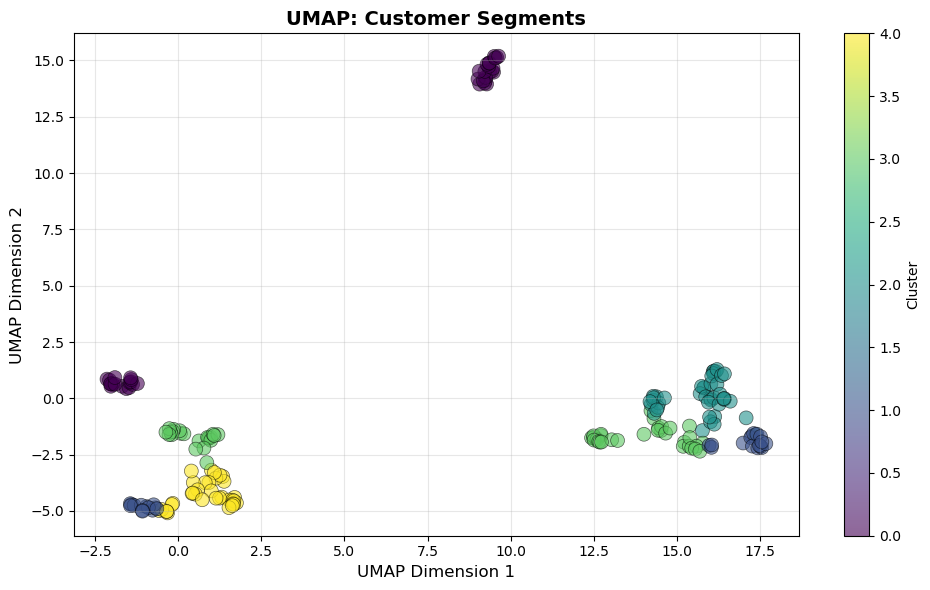

In [10]:
import umap

# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15)
X_umap = umap_reducer.fit_transform(X_scaled)

# Visualize UMAP
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters, cmap='viridis', 
                     s=100, alpha=0.6, edgecolors='black', linewidth=0.5)
plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)
plt.title('UMAP: Customer Segments', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()